In [1]:
from models import Models
from Data_preprocessing import split_60 ,split_train_val_test ,load_data
from utils import save_data, split_train_test ,plot_scatter_hr ,plot_loss ,calculate_loss_hr
from custom_callbacks import EarlyStoppingIncreasingValLoss

from sklearn.preprocessing import MinMaxScaler


import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt



from tensorflow.keras.models import save_model

from keras.optimizers import RMSprop ,Adam ,SGD ,Adagrad
from keras.callbacks import EarlyStopping

import json
import os
import time
import datetime
import numpy as np


import tensorflow as tf
tf.random.set_seed(1234)

2023-06-22 17:32:11.476364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 17:32:12.406348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.1/lib64:
2023-06-22 17:32:12.406371: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-22 17:32:12.567554: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-22 17:32:15.29

In [2]:
model_name = 'model2_hr'
NUM_EPOCH = 180
scaled = False
prepros = '60_no_overlap'
target = 'calculated_hr'

# lr = 5e-4
# optimizer = RMSprop(learning_rate=lr)
# loss = "mse"

(5439, 1813, 1813)


,calculated_hr
0,99.23
1,86.31
2,57.83
3,68.22
4,72.06
...,...
9060,82.40
9061,77.07
9062,90.76
9063,69.99


(9065, 60)
(9065, 1)


2023-06-22 17:32:21.437482: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-22 17:32:21.437548: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (atamach01): /proc/driver/nvidia/version does not exist
2023-06-22 17:32:21.439507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 240)          173760    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 60, 240)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 120)              144480    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 1

136/136 [==============================] - 20s 150ms/step - loss: 176.5176 - mse: 176.5176 - mae: 10.3275 - val_loss: 177.3502 - val_mse: 177.3502 - val_mae: 10.3886
Epoch 39/180
136/136 [==============================] - 20s 150ms/step - loss: 176.5425 - mse: 176.5425 - mae: 10.3399 - val_loss: 177.3121 - val_mse: 177.3121 - val_mae: 10.3712
Epoch 40/180
136/136 [==============================] - ETA: 0s - loss: 176.5079 - mse: 176.5079 - mae: 10.3328
self.wait-1
136/136 [==============================] - 20s 150ms/step - loss: 176.5079 - mse: 176.5079 - mae: 10.3328 - val_loss: 177.3475 - val_mse: 177.3475 - val_mae: 10.3883
Epoch 41/180
136/136 [==============================] - 21s 152ms/step - loss: 176.5152 - mse: 176.5152 - mae: 10.3401 - val_loss: 177.3141 - val_mse: 177.3141 - val_mae: 10.3709
Epoch 42/180
136/136 [==============================] - 20s 150ms/step - loss: 176.5349 - mse: 176.5349 - mae: 10.3354 - val_loss: 177.3124 - val_mse: 177.3124 - val_mae: 10.3711
Epoch 4

136/136 [==============================] - 21s 152ms/step - loss: 90.9687 - mse: 90.9687 - mae: 5.8341 - val_loss: 96.5990 - val_mse: 96.5990 - val_mae: 5.2755
Epoch 84/180
136/136 [==============================] - 21s 153ms/step - loss: 91.6888 - mse: 91.6888 - mae: 5.8068 - val_loss: 111.9954 - val_mse: 111.9954 - val_mae: 6.2796
Epoch 85/180
136/136 [==============================] - 21s 157ms/step - loss: 89.8453 - mse: 89.8453 - mae: 5.7441 - val_loss: 89.7952 - val_mse: 89.7952 - val_mae: 5.4320
Epoch 86/180
136/136 [==============================] - 21s 155ms/step - loss: 88.2939 - mse: 88.2939 - mae: 5.6647 - val_loss: 93.7790 - val_mse: 93.7790 - val_mae: 5.3963
Epoch 87/180
136/136 [==============================] - 21s 154ms/step - loss: 87.7278 - mse: 87.7278 - mae: 5.6475 - val_loss: 94.7364 - val_mse: 94.7364 - val_mae: 5.2160
Epoch 88/180
136/136 [==============================] - 21s 152ms/step - loss: 86.5389 - mse: 86.5389 - mae: 5.5996 - val_loss: 90.3347 - val_mse:

136/136 [==============================] - 24s 177ms/step - loss: 45.7090 - mse: 45.7090 - mae: 4.0596 - val_loss: 73.6549 - val_mse: 73.6549 - val_mae: 4.9929
Epoch 131/180
136/136 [==============================] - 21s 156ms/step - loss: 44.5263 - mse: 44.5263 - mae: 4.0493 - val_loss: 79.3024 - val_mse: 79.3024 - val_mae: 5.0120
Epoch 132/180
136/136 [==============================] - 21s 152ms/step - loss: 44.9143 - mse: 44.9143 - mae: 4.0411 - val_loss: 75.1094 - val_mse: 75.1094 - val_mae: 4.9328
Epoch 133/180
136/136 [==============================] - 21s 155ms/step - loss: 43.4788 - mse: 43.4788 - mae: 3.9732 - val_loss: 72.8034 - val_mse: 72.8034 - val_mae: 4.8746
Epoch 134/180
136/136 [==============================] - 20s 147ms/step - loss: 42.1280 - mse: 42.1280 - mae: 3.9783 - val_loss: 76.4276 - val_mse: 76.4276 - val_mae: 5.2386
Epoch 135/180
136/136 [==============================] - 20s 146ms/step - loss: 40.7916 - mse: 40.7916 - mae: 3.9254 - val_loss: 71.6262 - val_m

136/136 [==============================] - 20s 146ms/step - loss: 19.3968 - mse: 19.3968 - mae: 3.0097 - val_loss: 77.8108 - val_mse: 77.8108 - val_mae: 4.8638
Epoch 177/180
136/136 [==============================] - 20s 146ms/step - loss: 21.1055 - mse: 21.1055 - mae: 3.0489 - val_loss: 70.9527 - val_mse: 70.9527 - val_mae: 4.9191
Epoch 178/180
136/136 [==============================] - 20s 146ms/step - loss: 21.2210 - mse: 21.2210 - mae: 3.0913 - val_loss: 74.1187 - val_mse: 74.1187 - val_mae: 4.9385
Epoch 179/180
136/136 [==============================] - 20s 147ms/step - loss: 20.1547 - mse: 20.1547 - mae: 3.0221 - val_loss: 73.1657 - val_mse: 73.1657 - val_mae: 4.7810
Epoch 180/180
136/136 [==============================] - ETA: 0s - loss: 19.2750 - mse: 19.2750 - mae: 2.9660
self.wait-2

Early stopping due to validation loss increase.
57/57 [==============================] - 3s 36ms/step
MAE: 4.590522624382444
MSE: 58.21703085984048


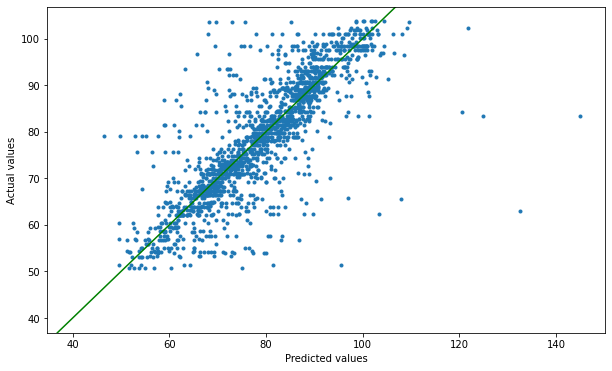

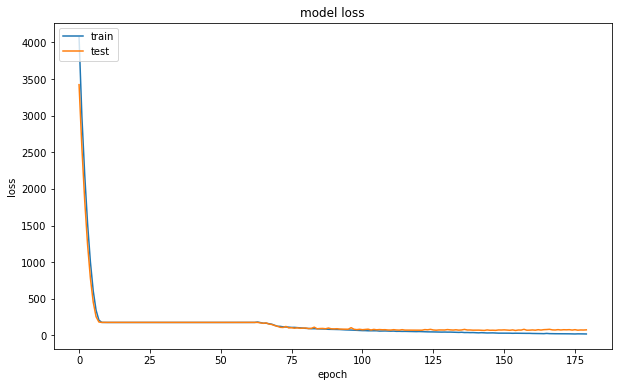

In [3]:

lr_list = [5e-4]
loss_list = ['mse']
target_list = ['calculated_hr']
prepros_list = ['60']

for target in target_list:
    for prepros in prepros_list:
        for loss in loss_list:
            for lr in lr_list:
        #         optimizer_list = [RMSprop(learning_rate=lr) ,Adam(learning_rate=lr) ,SGD(learning_rate=lr) ,Adagrad(learning_rate=lr)]
                optimizer_list = [RMSprop(learning_rate=lr)]

                for optimizer in optimizer_list:

                    df , ratio = load_data(prepros)

                    df_input = df.drop(['DBP','SBP','hr','calculated_hr'], axis=1)
                    df_target = df[[target]]

                    display(df_target)

                    scaler = MinMaxScaler()
                    scaled_df_target = scaler.fit_transform(df_target)
                    print(df_input.shape)
                    print(scaled_df_target.shape)

                    if scaled == True:
                        df_target = scaled_df_target

                    X_train, y_train, X_val, y_val, X_test, y_test = split_train_test(df_input ,df_target ,ratio)

                    models = Models()
                    model = models.import_model(model_name)
                    model.summary()

                    model.compile(loss=loss, optimizer=optimizer, metrics=['mse','mae'])

                    early_stopping = EarlyStoppingIncreasingValLoss(patience=2, delta=0, check_interval=20, increase_threshold=0.002)
                    history = model.fit(X_train, y_train, validation_split=0.2, epochs=NUM_EPOCH ,callbacks=[early_stopping])

                    optimizer_name = optimizer.get_config()['name']

                    result_name = f'{model_name}_lr_{lr}_NUM_EPOCH_{NUM_EPOCH}_optimizer_{optimizer_name}_loss_{loss}_scaled_{scaled}_prepros_{prepros}_target_{target}_2'
                    folder_path = f'./hr_optimization_results/{result_name}'
                    os.makedirs(folder_path)

                    history_dict = history.history
                    with open(f'{folder_path}/history.json', 'w') as f:
                        json.dump(history_dict, f)

                    results = model.evaluate(X_test, y_test)
                    save_model(model, f"{folder_path}/model.h5")

                    y_predicted = model.predict(X_test)

                    if scaled == True:
                        y_predicted_temp = scaler.inverse_transform(y_predicted)
                        y_test_temp = scaler.inverse_transform(y_test)
                    else:
                        y_predicted_temp = y_predicted
                        y_test_temp = y_test


                    y_predicted_df = pd.DataFrame(y_predicted_temp)
                    y_test_df = pd.DataFrame(y_test_temp)

                    plot_scatter_hr(y_predicted_df,y_test_df ,folder_path)

                    mae , mse = calculate_loss_hr(y_predicted_df,y_test_df)

                    plot_loss(history_dict ,folder_path)

                    out_dict = {
                            'model_name':[model_name],
                            'lr':[lr],
                            'epochs':[NUM_EPOCH],
                            'optimizer':[optimizer_name],
                            'loss':[loss],
                            'results':[results],
                            'mae':[mae],
                            'mse':[mse],
                            'scaled':[scaled],
                            'prepros':[prepros], 
                            'target':[target],
                            'time':[datetime.datetime.now()]

                            }

                    save_data(out_dict, 'sheets/hr_model_optimizing_cal_hr.csv')